In [4]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display, Image
from typing import Annotated, TypedDict
from operator import add

In [10]:
# 1. Define Schema
class State(TypedDict):
    foo : int
    bar : Annotated[list[str], add]

# 2. Define Nodes
def node_a(state:State):
    print("---- Node A ----")
    return {
        "foo":"a",
        "bar":["a"]
    }
def node_b(state:State):
    print("---- Node B ----")
    return {
        "foo":"b",
        "bar":["b"]
    }

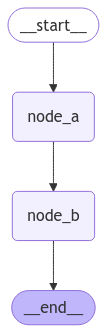

In [12]:
# Define the graph
builder = StateGraph(State)
builder.add_node(node_a)
builder.add_node(node_b)
builder.add_edge(START,"node_a")
builder.add_edge("node_a","node_b")
builder.add_edge("node_b",END)

checkpointer = MemorySaver()

graph = builder.compile(checkpointer=checkpointer)

display(Image(graph.get_graph().draw_mermaid_png()))

In [42]:
config = {"configurable":{"thread_id":2}}
graph.invoke({"foo":""}, config=config)

---- Node A ----
---- Node B ----


{'foo': 'b', 'bar': ['a', 'b', 'a', 'b']}

In [41]:
# See the current state
print(graph.get_state(config=config))

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_id': '0c62ca34-ac19-445d-bbb0-5b4984975b2a'}}, metadata=None, created_at=None, parent_config=None, tasks=())


In [47]:
# see the state history
for state in (graph.get_state_history(config={"configurable":{"thread_id":2}})):
    print(state)

StateSnapshot(values={'foo': 'b', 'bar': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1efd8934-0ef8-6605-8006-fc43c9ef5733'}}, metadata={'source': 'loop', 'writes': {'node_b': {'foo': 'b', 'bar': ['b']}}, 'thread_id': 2, 'step': 6, 'parents': {}}, created_at='2025-01-22T07:34:03.300592+00:00', parent_config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1efd8934-0ef6-63a5-8005-d78e3dc6c7ab'}}, tasks=())
StateSnapshot(values={'foo': 'a', 'bar': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1efd8934-0ef6-63a5-8005-d78e3dc6c7ab'}}, metadata={'source': 'loop', 'writes': {'node_a': {'foo': 'a', 'bar': ['a']}}, 'thread_id': 2, 'step': 5, 'parents': {}}, created_at='2025-01-22T07:34:03.299712+00:00', parent_config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1efd8934-0ef3-6ce5-8004-35eaf8b6f959'}}, tasks=

In [44]:
# replay graph execution upto a specific checkpoint id
config = {'configurable': {'thread_id': 2, 'checkpoint_id': '1efd892d-4a9a-631d-8002-64ead1334176'}}
graph.invoke(None, config=config)

{'foo': 'b', 'bar': ['a', 'b']}

In [46]:
config = {"configurable":{"thread_id":3}}
graph.invoke({"foo":""}, config=config)

EmptyInputError: Received no input for __start__